In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pickle

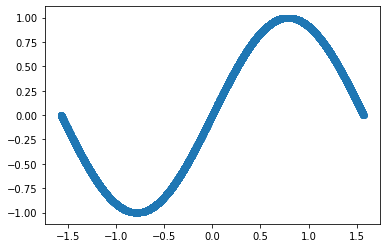

In [4]:
x_range=[-0.5*np.pi,0.5*np.pi]
period=np.pi
N=10000
x_data =np.random.rand(N)*(x_range[1]-x_range[0])+x_range[0]
y_data =np.sin(x_data*(2*np.pi/period))

x_test_range = [-0.5*np.pi,0.5*np.pi]
x_test=np.random.rand(N)*(x_test_range[1]-x_test_range[0])+x_test_range[0]
x_squared=x_test**2 
#x_squared=x_data**2 

plt.scatter(x_data,y_data)

In [3]:
'''
xtestrange=xrange
#x_test=np.random.rand(int(N/10))*(xtestrange[1]-xtestrange[0])+xtestrange[0]
#x_test = np.linspace(xtestrange[0],xtestrange[1],N)
x_test = x
#y_test=np.sin(x_test*(2*np.pi/period))
y_test = y
'''

In [26]:
nodes = 50

inputs=keras.Input(shape=(1,))
xx=keras.layers.Dense(nodes,activation='relu')(inputs)
xx=keras.layers.Dense(nodes,activation='relu')(xx)
xx=keras.layers.Dense(nodes,activation='relu')(xx)
outputs=keras.layers.Dense(1,activation='linear')(xx)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='Nadam',
              loss='MAE',
              metrics=['accuracy'])

'''
opt = keras.optimizers.Nadam(lr=0.004, beta_1=0.9995, beta_2=0.999, epsilon=1e-9)
model.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['mae', 'mse'])
'''

"\nopt = keras.optimizers.Nadam(lr=0.004, beta_1=0.9995, beta_2=0.999, epsilon=1e-9)\nmodel.compile(loss='mean_absolute_error',\n              optimizer=opt,\n              metrics=['mae', 'mse'])\n"

In [29]:

#model.fit(np.array([x_data,x_squared]).T,y_data,epochs=1000,verbose=0)
#model.fit(np.array([x_data,x_squared]).T,y_data,epochs=10,verbose=1) #verbose=1 gives printout for each epoch
epochs = 130

def epochs_progress(epochs=epochs,perc_step = 'ten'): #perc_step either takes 'ten' or 'one'
    #eps = np.array(list(range(epochs)))
    eps_perc = np.array(list(range(epochs)))/epochs

    if perc_step == 'one':
        percs = np.linspace(0,1,101)
    elif perc_step == 'ten':
        percs = np.linspace(0,1,11)
    else:
        perc_step_error = '"perc_step" takes the valid parameters "one" or "ten" not: "{}"'.format(perc_step)
        raise Exception(perc_step_error)
    perc_list = []
    for i in percs:
        perc_list.append(eps_perc[(np.abs(eps_perc - i)).argmin()])
    return perc_list
progress = epochs_progress(perc_step='one')

#'''
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    #if epoch % 10000 == 0: print('')
    #if epoch % 10 == 0: print('.', end='')
    #if epoch % 10 == 0: print(str(int((epoch/epochs)*100))+'%')
     if epoch/epochs in progress:
        if len(progress) == 11:
                print(str(round(epoch/epochs,1)*100)+'%')
        else:
                print(str(round(epoch/epochs,2)*100)+'%')

       
#model.fit(np.array([x_data,x_squared]).T, y_data,
model.fit(np.array([x_data]).T, y_data,
    epochs=epochs,
    #validation_split=0.00, 
    verbose=0,
    callbacks=[PrintDot()])
#'''
model.save('NN_attempt1.h5')

0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.000000000000001%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.000000000000002%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.000000000000004%
28.999999999999996%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.00000000000001%
56.00000000000001%
56.99999999999999%
57.99999999999999%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%


In [24]:
model.evaluate(np.array([x_test,x_test**2]).T,y_test,verbose=2)

NameError: name 'y_test' is not defined

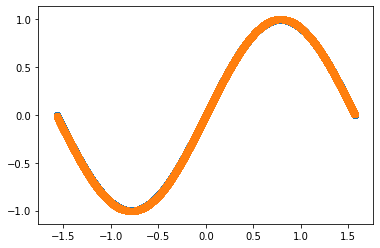

In [7]:

predictions=model.predict(np.array([x_test,x_test**2]).T,verbose=0)
plt.scatter(x_test,y_test)
plt.scatter(x_test,predictions)
plt.show()